<a href="https://colab.research.google.com/github/megano/vaccine/blob/main/prioritization_analysis_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -q gwpy
import pandas as pd

# Data Cleaning Process goes from 1 - 37. Please scroll down to cell number 37 for visuals.

In [2]:
#@title 1
%%capture
# import CCVI & census data csv
df_raw = pd.read_csv('https://storage.googleapis.com/ccvi_county/ccvi_county.csv') #, index_col='[index]')
df_raw.head()

In [3]:
#@title 2
%%capture
# filter out California data

# surpress SettingWithCopyError message 
pd.options.mode.chained_assignment = None

ca_df_raw = df_raw.loc[df_raw['State Abbreviation'] == "CA"]
ca_df_raw.head()

In [4]:
#@title 3
%%capture
# check if this is has the correct number of counties. California has 58 counties
len(ca_df_raw)

In [5]:
#@title 4
%%capture
# add covid information for each county. CC stands for confirmed cases
df_covid_cc_US = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

df_covid_cc_CA = df_covid_cc_US.loc[df_covid_cc_US['Province_State'] == "California"]
# check if we have 58 counties
#len(df_covid_cc_CA)
#60

df_covid_cc_CA.head()

In [6]:
#@title 5
%%capture
# need to clean the data and find the 2 extra records in df_covid_cc_CA

# first grab all the county names in combined_key and remove the California, US to get the County names.
df_covid_cc_CA['Combined_Key'] = df_covid_cc_CA['Combined_Key'].apply(lambda x: x.split(",")[0])
df_covid_cc_CA.head()

In [7]:
#@title 6
%%capture
print(len(df_covid_cc_CA.Combined_Key.values))
print(len(ca_df_raw.County.values))

In [8]:
#@title 7
%%capture
lst1 = df_covid_cc_CA.Combined_Key.values
lst2 = ca_df_raw.County.values

new_list = [
    list(set(lst1).difference(lst2))
]
new_list

# We see covid confirmed cases US has two rows that we have to remove 'Out of CA', 'Unassigned'

In [9]:
#@title 8
%%capture
# extract rows 'Out of CA', 'Unassigned'
df_covid_cc_CA.drop(df_covid_cc_CA.loc[df_covid_cc_CA['Combined_Key']=="Out of CA"].index, inplace=True)
df_covid_cc_CA.drop(df_covid_cc_CA.loc[df_covid_cc_CA['Combined_Key']=="Unassigned"].index, inplace=True)
len(df_covid_cc_CA)

In [10]:
#@title 9
%%capture
# Check if we have identical Counties
import numpy as np
check_counties = (np.array(ca_df_raw.County.values) == np.array(df_covid_cc_CA.Combined_Key.values))
check_counties

In [11]:
#@title 10
%%capture
# creata total_cases row
df_covid_cc_CA['total_cases']= df_covid_cc_CA[df_covid_cc_CA.columns[-1]]
df_covid_cc_CA.head()

In [12]:
#@title 11
%%capture
# Check total confirmed total cases in CA
df_covid_cc_CA["total_cases"].sum()

In [13]:
#@title 12
%%capture
# Now merge Lat, Lon_ and total cases with ca_df_raw
ca_df_raw["Longitude"] = df_covid_cc_CA.Long_.values
ca_df_raw["Latitude"] = df_covid_cc_CA.Lat.values
ca_df_raw["Total Covid19 Cases"] = df_covid_cc_CA.total_cases.values

ca_df_raw.head()

In [14]:
#@title 13
%%capture
# Now we need to add total number of covid19 deaths per county to the ca_df_raw
# add covid death information for each county. 
df_covid_deaths_US = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

df_covid_deaths_CA = df_covid_deaths_US.loc[df_covid_deaths_US['Province_State'] == "California"]

df_covid_deaths_CA.head()

In [15]:
#@title 14
%%capture
# we clean the data and just grab the county name in Combined_Key column
df_covid_deaths_CA['Combined_Key'] = df_covid_deaths_CA['Combined_Key'].apply(lambda x: x.split(",")[0])
df_covid_deaths_CA.head()

In [16]:
#@title 15
%%capture
# extract rows 'Out of CA', 'Unassigned'
df_covid_deaths_CA.drop(df_covid_deaths_CA.loc[df_covid_deaths_CA['Combined_Key']=="Out of CA"].index, inplace=True)
df_covid_deaths_CA.drop(df_covid_deaths_CA.loc[df_covid_deaths_CA['Combined_Key']=="Unassigned"].index, inplace=True)
len(df_covid_deaths_CA)

In [17]:
#@title 16
%%capture
# creata total_death row
df_covid_deaths_CA['total_deaths']= df_covid_deaths_CA[df_covid_deaths_CA.columns[-1]]
df_covid_deaths_CA.head()

In [18]:
#@title 17
%%capture
# Check total deaths CA
df_covid_deaths_CA["total_deaths"].sum()

In [19]:
#@title 18
%%capture
# Now merge total deaths with df_raw
ca_df_raw["Total Covid19 Deaths"] = df_covid_deaths_CA.total_deaths.values

ca_df_raw.head()

In [20]:
#@title 19 - Import Hospital Data
%%capture
# import hospital data 
hospital_raw = pd.read_csv("https://data.ca.gov/dataset/529ac907-6ba1-4cb7-9aae-8966fc96aeef/resource/42d33765-20fd-44b8-a978-b083b7542225/download/hospitals_by_county.csv")
hospital_raw

In [21]:
#@title 20
%%capture
# First we need to change todays_date column to a datetime column
hospital_raw['todays_date'] = pd.to_datetime(hospital_raw['todays_date'])
most_recent_date = hospital_raw["todays_date"].max()
most_recent_date.date()

# hospital_raw = hospital_raw.loc[hospital_raw['todays_date'] == most_recent_date ]
# hospital_raw
x = hospital_raw.groupby(by=["county"]).sum()
len(x.index)

lst3 = list(x.index)

new_list1 = [
    list(set(lst2).difference(lst3))
]
new_list1

# No hospital data from Alpine and Sierra

In [22]:
#@title 21
%%capture
# we grab the data from the most recent date
hospital_raw = hospital_raw.loc[hospital_raw['todays_date'] == most_recent_date ]

# create a columns list 
columns_lst = list(hospital_raw.columns)

# create an empty list to add the cities that don't have hospital data.
empty_list = []

# loop over new_list1[0]
for i in new_list1[0]:
  data = [str(i),most_recent_date,None,None,None,None,None,None,None]
  empty_list.append(data)

# create a second dataframe
hospital_raw_df2 = pd.DataFrame(empty_list,columns=columns_lst)

# append the second dataframe to hospital_raw
hospital_raw = hospital_raw.append(hospital_raw_df2, ignore_index=True)

# we sort the hospital data by county name
hospital_raw = hospital_raw.sort_values("county")

# length should be 58
len(hospital_raw)

In [23]:
#@title 22
%%capture
# check hospital data now
hospital_raw.head()

In [24]:
#@title 23
%%capture
# now we add the hospital data to our original ca_df_raw

# Now merge the hospital data to each county in ca_df_raw
ca_df_raw["todays_date"] = hospital_raw.todays_date.values
ca_df_raw["hospitalized_covid_confirmed_patients"] = hospital_raw.hospitalized_covid_confirmed_patients.values
ca_df_raw["hospitalized_suspected_covid_patients"] = hospital_raw.hospitalized_suspected_covid_patients.values
ca_df_raw["hospitalized_covid_patients"] = hospital_raw.hospitalized_covid_patients.values
ca_df_raw["all_hospital_beds"] = hospital_raw.all_hospital_beds.values
ca_df_raw["icu_covid_confirmed_patients"] = hospital_raw.icu_covid_confirmed_patients.values
ca_df_raw["icu_suspected_covid_patients"] = hospital_raw.icu_suspected_covid_patients.values
ca_df_raw["icu_available_beds"] = hospital_raw.icu_available_beds.values

ca_df_raw.head()

In [25]:
#@title 24
%%capture
# cleaned data as of now 
ca_df_raw.head()

In [26]:
#@title 25 - Import Population Data
%%capture
# We grab the population data from the year 2020.
# cities_pop = pd.read_html('https://www.california-demographics.com/counties_by_population', header = 0)
cities_pop = pd.read_html('https://worldpopulationreview.com/us-counties/states/ca', header = 0)
df_pop = cities_pop[0]
df_pop = df_pop.rename(columns={"2021 Population": "Population"})

city_lst = []
for i in df_pop.Name.values:
  spl_string = i.split()
  rm = spl_string[:-1]
  listToStr = ' '.join([str(elem) for elem in rm])
  city_lst.append(listToStr)

df_pop['county'] = city_lst
df_pop = df_pop.drop(columns=['Name'],axis=1)
df_pop

# # We create a dictionary where keys are city and the value is the population number.
pop_dict = pd.Series(df_pop.Population.values,index=df_pop.county).to_dict()
# pop_dict.pop('United States Census Bureau. Annual Estimates of the Resident Population: April 1, 2010 to July 1, 2019. U.S. Census Bureau, Population Division. Web. May 2020. http://www.census.gov/. United States Census Bureau. B01001 SEX BY AGE, 2019 American Community Survey 5-Year Estimates. U.S. Census Bureau, American Community Survey Office. Web. 10 December 2020.')
pop_dict

In [27]:
#@title 26
%%capture
# We create a list of the locations in the dataset
df_loc_lst = list(ca_df_raw.County.values)

pop_lst = []

# Iterated of the list of locations in the dataset.
for i in df_loc_lst:
    try:
        # Append the population to the pop_lst
        pop_lst.append(pop_dict[i])
    except KeyError:
        # If it doesn't have the city in the data that we scraped we just add 0
        pop_lst.append(0)
        continue

# Create a new column
ca_df_raw["population"] = pop_lst
ca_df_raw.head()

In [28]:
#@title 27
%%capture
# check df data types
ca_df_raw.info()

In [29]:
#@title 28
%%capture
# run basic stats
ca_df_raw.describe()

In [30]:
#@title 29
%%capture
ca_df_raw.columns

In [31]:
#@title 30
%%capture
# rename cols for easier referencing
ca_df_raw.rename(columns={
    'State': 'state',
    'State Abbreviation': 'abbreviation',
    'County': 'county',
    'FIPS (5-digit)': 'fips',
    'THEME 1: Socioeconomic Status':'t1_socioecon',
    'THEME 2:\nHousehold Composition & Disability': 't2_household',
    'THEME 3: \nMinority Status & Language' : 't3_minority',
    'THEME 4: \nHousing Type & Transportation' : 't4_housing',
       'THEME 5: Epidemiological Factors' : 'epidim',
       'THEME 6: Healthcare System Factors' : 'healthcare_sys',
       'CCVI SCORE\nHigher = More Vulnerable' : 'ccvi_score',
       'Longitude' : 'long', 
       'Latitude' : 'lat',
       'Total Covid19 Cases': 'covid_total', 
       'Total Covid19 Deaths' : 'covid_deaths',
       'hospitalized_covid_confirmed_patients' : 'covid_confirmed',
       'hospitalized_suspected_covid_patients' : 'covid_suspected',
       'hospitalized_covid_patients' : 'covid_total_hospitalized'}, 
       inplace = True, errors='raise')

In [32]:
#@title 31
%%capture
# add columns for per 100k 
ca_df_raw['covid_cases_per_100k'] = ca_df_raw.apply(lambda x: (x.covid_total/x.population) * 100000, axis = 1)
ca_df_raw['covid_deaths_per_100k'] = ca_df_raw.apply(lambda x: (x.covid_deaths/x.population) * 100000, axis = 1)

In [33]:
#@title 32
%%capture
# check # missing values
ca_df_raw.isnull().sum()

In [34]:
#@title 33
%%capture
ca_df_raw.loc[(ca_df_raw.covid_total < 100)]

In [35]:
#@title 35
%%capture
# convert "None" values to numeric
ca_df_raw.fillna(0)

In [36]:
#@title 36
%%capture
ca_df_raw.icu_available_beds.describe()

In [37]:
#@title 37
%%capture
covid_total_series = pd.Series(ca_df_raw.covid_total.values,ca_df_raw.county.values)
covid_deaths_series = pd.Series(ca_df_raw.covid_deaths.values,ca_df_raw.county.values)

In [70]:
import plotly.graph_objects as go
df = ca_df_raw
date_of_data = str(ca_df_raw.iloc[0,15].date())

# Drop rows that are not relevant for the plot.
df = df.drop(['state', 'abbreviation','fips', 't1_socioecon',
       't2_household', 't3_minority', 't4_housing', 'epidim', 'healthcare_sys',
       'long', 'lat', 'population',"todays_date" ],axis=1)
# plotly figure setup
fig = go.Figure()

# one trace for each df column
fig.add_trace(go.Bar(x=df['county'].values, y=df["covid_total"].values))


# one button for each df column
updatemenu= []
buttons=[]

for i in list(df.columns):
  buttons.append(dict(method='restyle',label = str(i),args=[{'x':[df["county"].values],'y':[df[i].values]}])
                  )
# buttons.append(dict(method='restyle',label = "Covid Deaths",args=[{'x':[df["county"].values],'y':[df["covid_deaths"].values]}])
#                   )
# buttons.append(dict(method='restyle',label = "CCVI Score",args=[{'x':[df["county"].values],'y':[df["ccvi_score"].values]}])
#                   )

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu, title_text = "Date: "+date_of_data)
fig.show()

In [131]:
import folium
import copy
from folium.plugins import MarkerCluster

# We take a copy of the original data frame
df_geo = copy.deepcopy(ca_df_raw)

# swap columns long and lat to lat and long.
columns_titles = ['state', 'abbreviation', 'county', 'fips', 't1_socioecon',
       't2_household', 't3_minority', 't4_housing', 'epidim', 'healthcare_sys',
       'ccvi_score', 'lat','long', 'covid_total', 'covid_deaths',
       'todays_date', 'covid_confirmed', 'covid_suspected',
       'covid_total_hospitalized', 'all_hospital_beds',
       'icu_covid_confirmed_patients', 'icu_suspected_covid_patients',
       'icu_available_beds', 'population', 'covid_cases_per_100k',
       'covid_deaths_per_100k']

df_geo = df_geo.reindex(columns=columns_titles)

df_geo.head()

# We create a list for each row in the dataframe.
geo_lst = df_geo.values.tolist()

# We create an empty list.
long_lat_lst = []

#We loop through the list and only append the long and lat values.
for i in geo_lst:
    long_lat_lst.append((i[12],i[11]))

# we draw the folium map
map = folium.Map(location=[36.17, -119.7462],zoom_start = 6)


for j in range(len(long_lat_lst)):
        
        # We grab the infos that we want to add to the popup.
        county_name = df_geo.iloc[j, df_geo.columns.get_loc("county")]
        covid_deaths = df_geo.iloc[j, df_geo.columns.get_loc("covid_deaths")]
        covid_total = df_geo.iloc[j, df_geo.columns.get_loc("covid_total")]
        popup_text = "County: {county_name} <br>""Covid19 Total: {covid_total}<br>""Covid19 Deaths: {covid_deaths}<br>".format(county_name=county_name,covid_total = covid_total, covid_deaths=covid_deaths)

        # We create the circles in the map. 
        folium.Circle(
        #radius=df.iloc[j]['covid_deaths_per_100k'] * 200,
        radius= int(df.iloc[j]['covid_deaths'])*9.8,
        weight=1,  # thickness of the border
        color='red',  # this is the color of the border
        opacity=0.3,  # this is the alpha for the border
        fill_color='red',  # fill is inside the circle
        fill_opacity=0.1,  # we will make that less opaque so we can see layers
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        popup = folium.Popup(popup_text,max_width=300),
        fill = True).add_to(map)

         # We create the circles in the map. 
        folium.Circle(
        #radius=df.iloc[j]['covid_deaths_per_100k'] * 200,
        radius= int(df.iloc[j]['covid_total'])*0.19,
        weight=1,  # thickness of the border
        color='blue',  # this is the color of the border
        opacity=0.3,  # this is the alpha for the border
        fill_color='blue',  # fill is inside the circle
        fill_opacity=0.1,  # we will make that less opaque so we can see layers
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        popup = folium.Popup(popup_text,max_width=300),
        fill = True).add_to(map)

map

In [40]:
# chloropleth map prep

# check the data types
df_geo.dtypes

state                                   object
abbreviation                            object
county                                  object
fips                                     int64
t1_socioecon                           float64
t2_household                           float64
t3_minority                            float64
t4_housing                             float64
epidim                                 float64
healthcare_sys                         float64
ccvi_score                             float64
lat                                    float64
long                                   float64
covid_total                              int64
covid_deaths                             int64
todays_date                     datetime64[ns]
covid_confirmed                         object
covid_suspected                         object
covid_total_hospitalized                object
all_hospital_beds                       object
icu_covid_confirmed_patients            object
icu_suspected

We have objects that contain numeric data:
- covid_confirmed
- covid_suspected
- covid_total_hospitalized
- all_hospital_beds
- icu_covid_confirmed_patients
- icu_suspected_covid_patients
- icu_available_beds

In [41]:
numerical_cols = ['covid_confirmed', 'covid_suspected',
'covid_total_hospitalized', 'all_hospital_beds', 'icu_covid_confirmed_patients',
'icu_suspected_covid_patients', 'icu_available_beds']

# convert these to floats using the pandas.Series.astype function
for column in numerical_cols:
    df_geo[column] = df_geo[column].astype(float)

In [42]:
# check what directory we're in
!ls

sample_data


Folium is a python library that allows you to create multiple types of Leaflet maps. To create a choropleth map, Folium requires a Geo JSON file, including geospatial data of the region. For a choropleth map of CA counties, we need a Geo JSON file that defines the boundaries of the counties. You can download the CA counties file from this link: https://github.com/codeforamerica/click_that_hood/blob/master/public/data/california-counties.geojson

To bind the data frame & json file, the name of the county in our data frame must exactly match the name in the json file. Let's check the names in the json file.

In [43]:
import json
# path to geojson map data for CA counties
CA_COUNTIES_GEO_FILEPATH = 'sample_data/ca-counties.geojson.txt' 

# open json file. json.load() methods returns a python dictionary
with open(CA_COUNTIES_GEO_FILEPATH) as counties_file:
    counties_json = json.load(counties_file)
    
# loop through dictionary to obtain name of counties in the json file
names_json = []
for index in range(len(counties_json['features'])):
    names_json.append(counties_json['features'][index]['properties']['name'])
    
names_json
sorted(names_json)

# remove quotes
for name in names_json:
    name = name.replace("'","")

In [44]:
df_geo.county

186            Alameda
187             Alpine
188             Amador
189              Butte
190          Calaveras
191             Colusa
192       Contra Costa
193          Del Norte
194          El Dorado
195             Fresno
196              Glenn
197           Humboldt
198           Imperial
199               Inyo
200               Kern
201              Kings
202               Lake
203             Lassen
204        Los Angeles
205             Madera
206              Marin
207           Mariposa
208          Mendocino
209             Merced
210              Modoc
211               Mono
212           Monterey
213               Napa
214             Nevada
215             Orange
216             Placer
217             Plumas
218          Riverside
219         Sacramento
220         San Benito
221     San Bernardino
222          San Diego
223      San Francisco
224        San Joaquin
225    San Luis Obispo
226          San Mateo
227      Santa Barbara
228        Santa Clara
229        

In [45]:
# make a list of names in the data frame
df_names = df_geo.county.tolist()

# names in the json file - the same order as in the data frame 
geojson_names = ['Alameda',
 'Alpine',
 'Amador',
 'Butte',
 'Calaveras',
 'Colusa',
 'Contra Costa',
 'Del Norte',
 'El Dorado',
 'Fresno',
 'Glenn',
 'Humboldt',
 'Imperial',
 'Inyo',
 'Kern',
 'Kings',
 'Lake',
 'Lassen',
 'Los Angeles',
 'Madera',
 'Marin',
 'Mariposa',
 'Mendocino',
 'Merced',
 'Modoc',
 'Mono',
 'Monterey',
 'Napa',
 'Nevada',
 'Orange',
 'Placer',
 'Plumas',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba']

# replace data frame names by json names
df_geo.replace(dict(zip(df_names, geojson_names)), inplace=True)
df_geo.county

186            Alameda
187             Alpine
188             Amador
189              Butte
190          Calaveras
191             Colusa
192       Contra Costa
193          Del Norte
194          El Dorado
195             Fresno
196              Glenn
197           Humboldt
198           Imperial
199               Inyo
200               Kern
201              Kings
202               Lake
203             Lassen
204        Los Angeles
205             Madera
206              Marin
207           Mariposa
208          Mendocino
209             Merced
210              Modoc
211               Mono
212           Monterey
213               Napa
214             Nevada
215             Orange
216             Placer
217             Plumas
218          Riverside
219         Sacramento
220         San Benito
221     San Bernardino
222          San Diego
223      San Francisco
224        San Joaquin
225    San Luis Obispo
226          San Mateo
227      Santa Barbara
228        Santa Clara
229        

In [46]:
# draw the folium map for covid death rates in CA counties
counties_map = folium.Map(location=[36.17, -119.7462],zoom_start = 6, tiles = 'Stamen Terrain')#'Stamen Toner')

folium.Choropleth(
  geo_data = CA_COUNTIES_GEO_FILEPATH,
  data = df_geo,
  columns = ['county', 'covid_deaths_per_100k'],
  key_on = 'feature.properties.name',
  fill_color = 'RdPu', 
  fill_opacity = 1, 
  line_opacity = 1,
  legend_name='CA County Covid Deaths per 100k Population',
  smooth_factor = 0).add_to(counties_map)

for j in range(len(long_lat_lst)):
        
        # We grab the infos that we want to add to the popup.
        county_name = df_geo.iloc[j, df_geo.columns.get_loc("county")]
        ccvi_score = df_geo.iloc[j, df_geo.columns.get_loc("ccvi_score")]
        covid_cases_per_100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_cases_per_100k")]
        covid_deaths_per_100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_deaths_per_100k")]
        covid_deaths_per100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_deaths")]
        popup_text = "County: {county_name} <br>""CCVI Score: {ccvi_score} <br>""Covid Total Per 100K: {covid_cases_per_100k} <br>""Covid Deaths Per 100K: {covid_deaths_per_100k} <br>".format(county_name=county_name,ccvi_score=ccvi_score, covid_cases_per_100k =covid_cases_per_100k, covid_deaths_per_100k = covid_deaths_per_100k)
"""
        #We create the circles in the map. 
        folium.Circle(
        radius=100,
        weight=2,  
        color='black',  
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        popup = folium.Popup(popup_text,max_width=300),
        fill = True).add_to(counties_map)
"""
        

#display map
counties_map

In [47]:
# draw the folium map for CCVI vulnerability rates in CA counties
counties_map = folium.Map(location=[36.17, -119.7462],zoom_start = 6, tiles ='Stamen Terrain') # 'Stamen Toner')

folium.Choropleth(
  geo_data = CA_COUNTIES_GEO_FILEPATH,
  data = df_geo,
  columns = ['county', 'ccvi_score'],
  key_on = 'feature.properties.name',
  fill_color = 'RdPu', 
  fill_opacity = 1, 
  line_opacity = 1,
  legend_name='CA County Covid Vulnerability (CCVI score)',
  smooth_factor = 0).add_to(counties_map)

for j in range(len(long_lat_lst)):
        
        # Grab info to add to the popup.
        county_name = df_geo.iloc[j, df_geo.columns.get_loc("county")]
        ccvi_score = df_geo.iloc[j, df_geo.columns.get_loc("ccvi_score")]
        covid_cases_per_100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_cases_per_100k")]
        covid_deaths_per_100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_deaths_per_100k")]
        covid_deaths_per100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_deaths")]
        popup_text = "County: {county_name} <br>""CCVI Score: {ccvi_score} <br>""Covid Total Per 100K: {covid_cases_per_100k} <br>""Covid Deaths Per 100K: {covid_deaths_per_100k} <br>".format(county_name=county_name,ccvi_score=ccvi_score, covid_cases_per_100k =covid_cases_per_100k, covid_deaths_per_100k = covid_deaths_per_100k)
"""
        # Create circles in the map. 
        folium.Circle(
        radius=100,
        weight=2,  
        color='black',  
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        popup = folium.Popup(popup_text,max_width=300),
        fill = True).add_to(counties_map)
"""
        

#display map
counties_map

In [113]:
# draw the folium map for Covid Case rates in CA counties
counties_map = folium.Map(location=[36.17, -119.7462],zoom_start = 6, tiles ='Stamen Terrain') # 'Stamen Toner')

folium.Choropleth(
  geo_data = CA_COUNTIES_GEO_FILEPATH,
  data = df_geo,
  columns = ['county', 'covid_cases_per_100k'],
  key_on = 'feature.properties.name',
  fill_color = 'RdPu', 
  fill_opacity = 1, 
  line_opacity = 1,
  legend_name='CA County Covid Cases per 100k',
  smooth_factor = 0).add_to(counties_map)

for j in range(len(long_lat_lst)):
        
        # Grab info to add to the popup.
        county_name = df_geo.iloc[j, df_geo.columns.get_loc("county")]
        ccvi_score = df_geo.iloc[j, df_geo.columns.get_loc("ccvi_score")]
        covid_cases_per_100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_cases_per_100k")]
        covid_deaths_per_100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_deaths_per_100k")]
        covid_deaths_per100k = df_geo.iloc[j, df_geo.columns.get_loc("covid_deaths")]
        popup_text = "County: {county_name} <br>""CCVI Score: {ccvi_score} <br>""Covid Total Per 100K: {covid_cases_per_100k} <br>""Covid Deaths Per 100K: {covid_deaths_per_100k} <br>".format(county_name=county_name,ccvi_score=ccvi_score, covid_cases_per_100k =covid_cases_per_100k, covid_deaths_per_100k = covid_deaths_per_100k)

        # Create circles in the map. 
        folium.Circle(
        radius=100,
        weight=2,  
        color='black',  
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        popup = folium.Popup(popup_text,max_width=300),
        fill = True).add_to(counties_map)

        # We create the circles in the map. 
        folium.Circle(
        #radius=df.iloc[j]['covid_deaths_per_100k'] * 200,
        radius= int(df.iloc[j]['covid_total'])*0.19,
        weight=1,  # thickness of the border
        color='blue',  # this is the color of the border
        opacity=0.3,  # this is the alpha for the border
        fill_color='blue',  # fill is inside the circle
        fill_opacity=0.1,  # we will make that less opaque so we can see layers
        location = [long_lat_lst[j][1],long_lat_lst[j][0]],
        popup = folium.Popup(popup_text,max_width=300),
        fill = True).add_to(counties_map)

        

#display map
counties_map

Text(0.5, 1.0, 'Covid Vulnerability by County in CA')

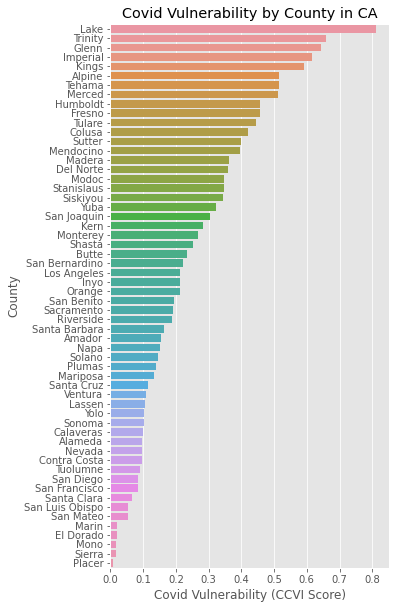

In [49]:
import seaborn as sns # for visuals
import matplotlib.pyplot as plt # for graphs
# how graphs are printed
%matplotlib inline 
plt.style.use('ggplot')

# Plot Covid Vulnerability by County

# order plot by ccvi score instead of default alphabetical county name
plot_order = ca_df_raw.sort_values(by='ccvi_score', ascending=False).county.values

# plot
ax = sns.barplot(x='ccvi_score', y='county', data=ca_df_raw, order=plot_order)#, palette='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(5, 10)
plt.xlabel("Covid Vulnerability (CCVI Score)")
plt.ylabel("County")
plt.title("Covid Vulnerability by County in CA")

# plt.savefig("ccvi_by_county.png", format='png',dpi=150)

Text(0.5, 1.0, 'Covid Total Deaths by County in CA')

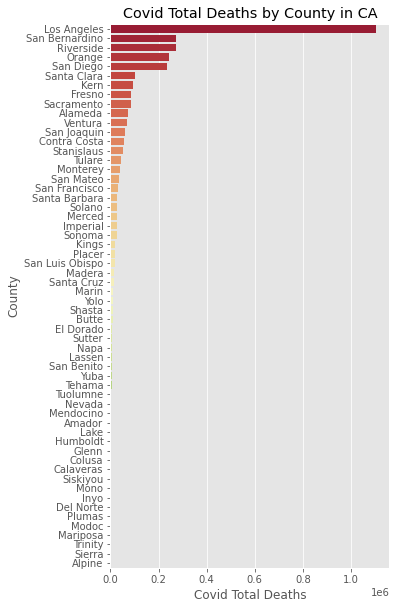

In [50]:
# Plot Covid Total Deaths by County
plot_order = ca_df_raw.sort_values(by='covid_total', ascending=False).county.values
ax = sns.barplot(x='covid_total', y='county', data=ca_df_raw, order=plot_order, palette='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(5, 10)
plt.xlabel("Covid Total Deaths")
plt.ylabel("County")
plt.title("Covid Total Deaths by County in CA")

Text(0.5, 1.0, 'Covid Deaths in CA Normalized by Population')

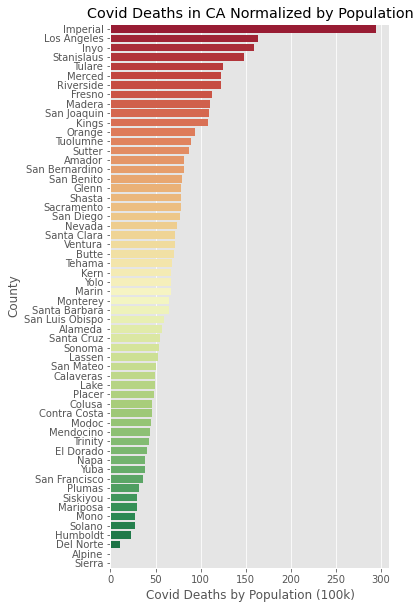

In [51]:
# Plot Covid Total Deaths by County
plot_order = ca_df_raw.sort_values(by='covid_deaths_per_100k', ascending=False).county.values
ax = sns.barplot(x='covid_deaths_per_100k', y='county', data=ca_df_raw, order=plot_order, palette='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(5, 10)
plt.xlabel("Covid Deaths by Population (100k)")
plt.ylabel("County")
plt.title("Covid Deaths in CA Normalized by Population")